In [341]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [342]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [343]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [344]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
93.3       1
63.1       1
93.5       1
83.3       1
75         1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [345]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [346]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [347]:
pr.poverty_rate = pr.poverty_rate.astype("float")

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

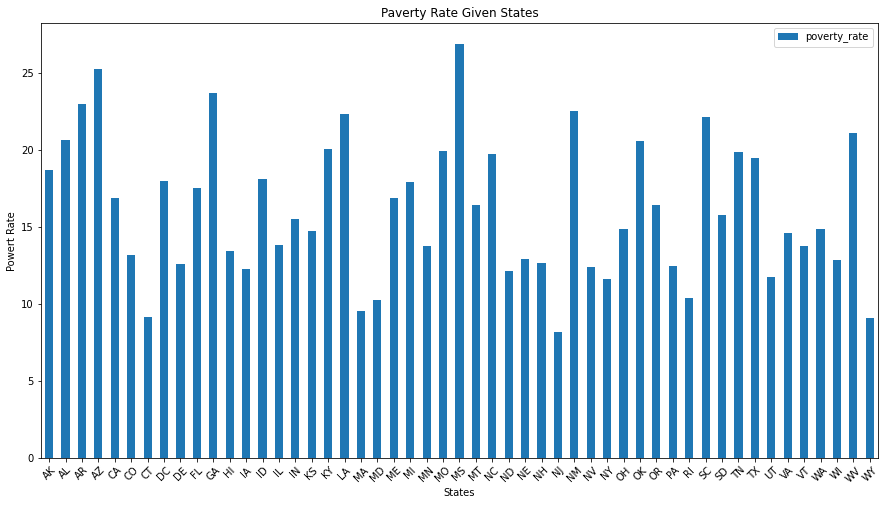

In [348]:
ax = pr.groupby("Geographic Area").mean().plot.bar(figsize = (15,8), rot = 45)
ax.set_title("Paverty Rate Given States")
ax.set_ylabel("Powert Rate")
ax.set_xlabel("States");

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

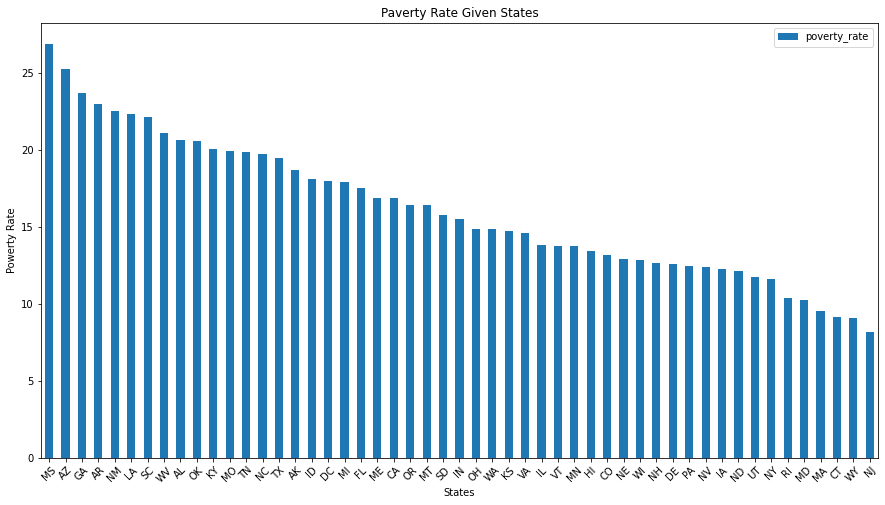

In [349]:
ax = pr.groupby("Geographic Area").mean().sort_values("poverty_rate", ascending = False).plot.bar(figsize = (15,8), rot = 45)
ax.set_title("Paverty Rate Given States")
ax.set_ylabel("Powerty Rate")
ax.set_xlabel("States");

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

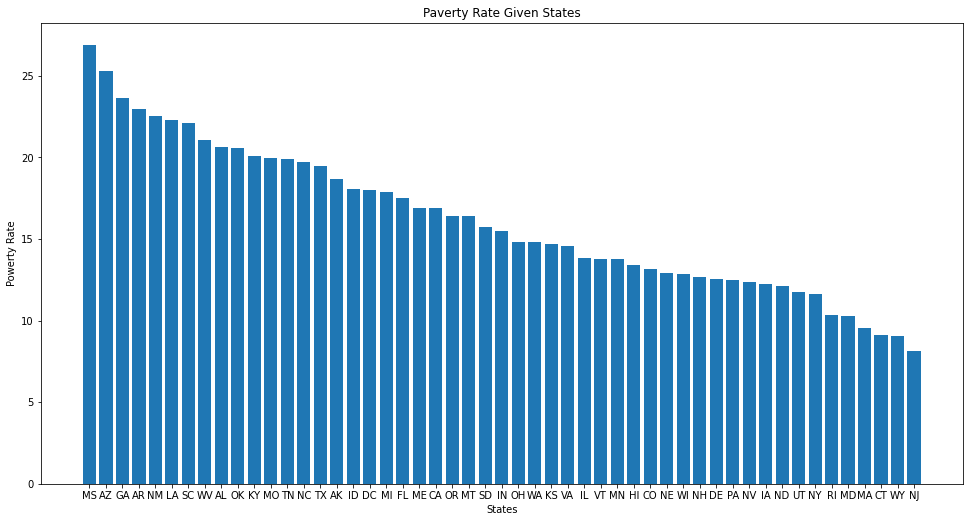

In [354]:
x = pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False)

fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.bar(x.index,x.values)
ax.set_title("Paverty Rate Given States")
ax.set_ylabel("Powerty Rate")
ax.set_xlabel("States");

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

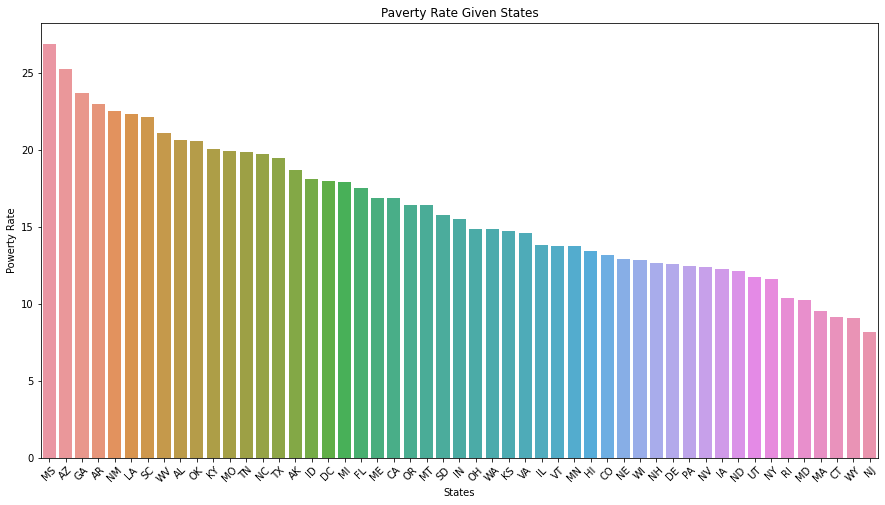

In [36]:
a = pr.groupby("Geographic Area").mean().sort_values("poverty_rate", ascending = False).index
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(pr["Geographic Area"], pr["poverty_rate"], order = a, ci = None)
plt.xticks(rotation = 45)
plt.title("Paverty Rate Given States")
plt.ylabel("Powerty Rate")
plt.xlabel("States");

## 2. Most common 15 Name or Surname of killed people 

In [357]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [358]:
kill.name.value_counts()

TK TK                       49
Michael Brown                2
Daquan Antonio Westbrook     2
Brandon Jones                2
Eric Harris                  2
                            ..
Jose Olivares                1
Rocco Joseph Palmisano       1
Francis Hartnett             1
Tyrone Harris                1
Joe Nevels                   1
Name: name, Length: 2481, dtype: int64

In [359]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [360]:
from collections import Counter

surname = []
name = []
for i in pairs:
    surname.append(i[-1])
    name += i[:-1]
total = name + surname
df3 = pd.DataFrame(total)
c = df3.value_counts().head(15)
c

Michael        91
David          57
James          57
Robert         48
Joseph         48
William        47
Daniel         46
John           42
Christopher    40
Lee            38
Smith          36
Richard        36
Anthony        32
J.             32
Johnson        32
dtype: int64

In [361]:
c

Michael        91
David          57
James          57
Robert         48
Joseph         48
William        47
Daniel         46
John           42
Christopher    40
Lee            38
Smith          36
Richard        36
Anthony        32
J.             32
Johnson        32
dtype: int64

In [362]:
a = []
for i in c.index:
    a.append("".join(i))
a

['Michael',
 'David',
 'James',
 'Robert',
 'Joseph',
 'William',
 'Daniel',
 'John',
 'Christopher',
 'Lee',
 'Smith',
 'Richard',
 'Anthony',
 'J.',
 'Johnson']

In [363]:
c.values

array([91, 57, 57, 48, 48, 47, 46, 42, 40, 38, 36, 36, 32, 32, 32],
      dtype=int64)

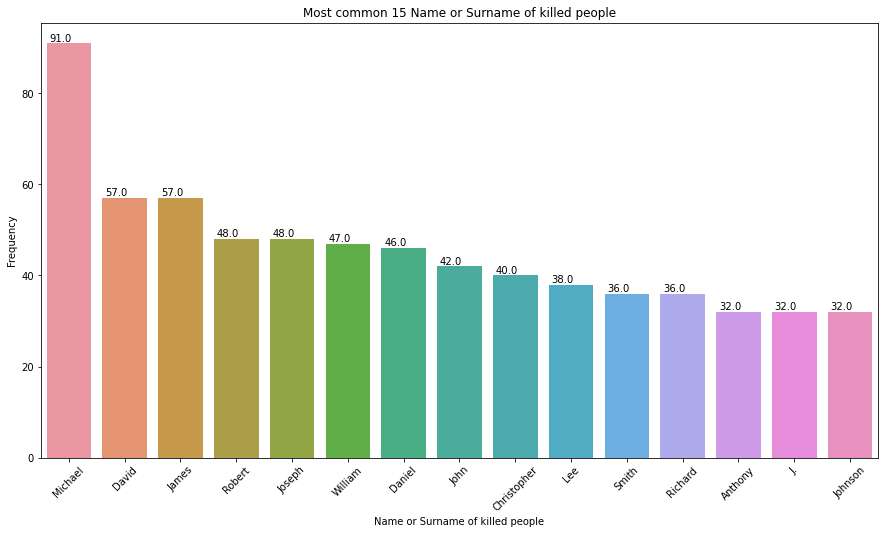

In [368]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(a, c.values, ci = None)
plt.xticks(rotation = 45)
plt.title("Most common 15 Name or Surname of killed people")
plt.ylabel("Frequency")
plt.xlabel("Name or Surname of killed people")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+0.5));

## 3. Killed People According to Races (Pie Chart)

In [179]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [180]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [182]:
d = kill.race.value_counts()
d

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [183]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [184]:
kill.dropna(subset = ["race"], inplace = True)

In [185]:
kill.shape

(2340, 14)

In [186]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2340 non-null   int64  
 1   name                     2340 non-null   object 
 2   date                     2340 non-null   object 
 3   manner_of_death          2340 non-null   object 
 4   armed                    2334 non-null   object 
 5   age                      2311 non-null   float64
 6   gender                   2340 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2340 non-null   object 
 9   state                    2340 non-null   object 
 10  signs_of_mental_illness  2340 non-null   bool   
 11  threat_level             2340 non-null   object 
 12  flee                     2288 non-null   object 
 13  body_camera              2340 non-null   bool   
dtypes: bool(2), float64(1), 

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [187]:
d

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [193]:
e = d/len(kill)
e

W    0.513248
B    0.264103
H    0.180769
A    0.016667
N    0.013248
O    0.011966
Name: race, dtype: float64

Text(0.5, 1.0, 'Killed People According to Race')

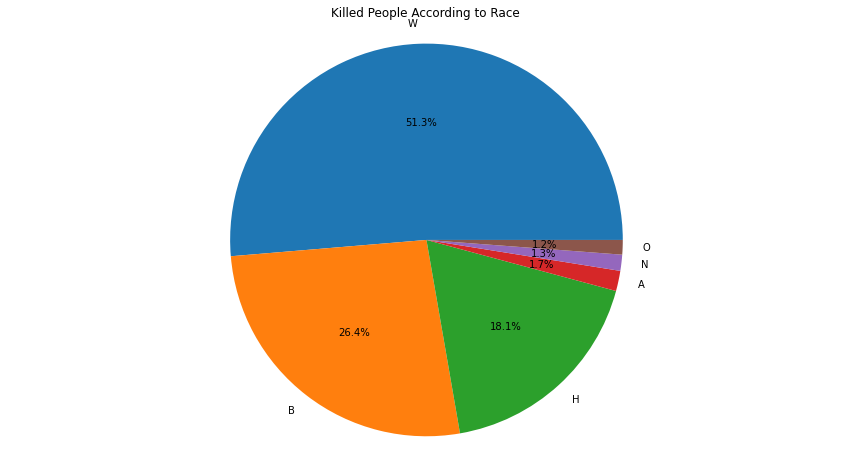

In [206]:
labels = e.index
sizes = e.values
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (15,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Killed People According to Race", loc = "Center" )


## 4a.Box plot of age in both genders separeted by manner of death.

In [211]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [212]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

<AxesSubplot:xlabel='gender', ylabel='age'>

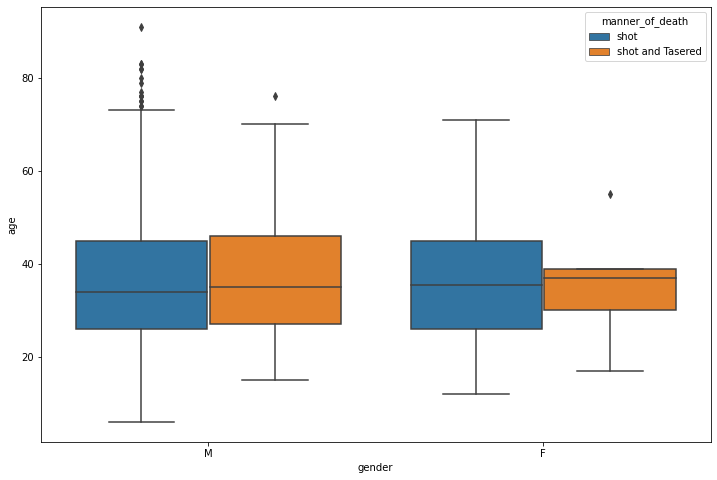

In [221]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("gender", "age", data = kill, hue = "manner_of_death")

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

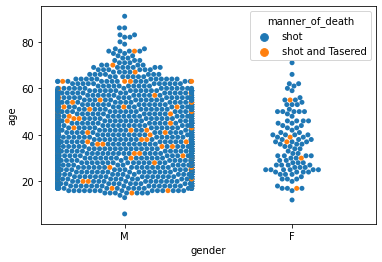

In [245]:
fig, ax = plt.subplots()
sns.swarmplot("gender", "age", data = kill, hue = "manner_of_death");

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

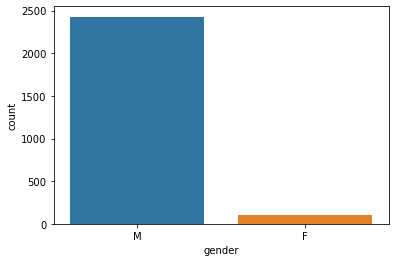

In [246]:
sns.countplot("gender", data = kill);

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [247]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [248]:
z = kill.armed.value_counts().head(7)
z

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [249]:
z.index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')

In [250]:
z.values

array([1398,  373,  177,  171,  117,  104,   18], dtype=int64)

Text(0.5, 1.0, 'Kill Weapon')

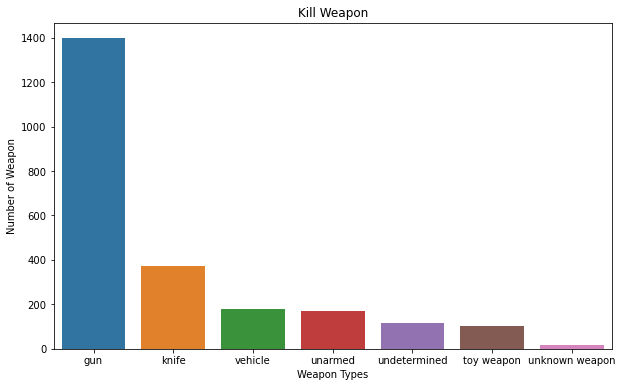

In [251]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(z.index, z.values, data = kill)
ax.set_xlabel("Weapon Types")
ax.set_ylabel("Number of Weapon")
ax.set_title("Kill Weapon")

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [261]:
below25 = len(kill[kill.age < 25])
below25

450

In [262]:
above25 = len(kill[kill.age > 25])
above25

1905

In [270]:
x = pd.Series([above25, below25], index = ["above25", "below25"])

Text(0.5, 1.0, 'Age of Killed People')

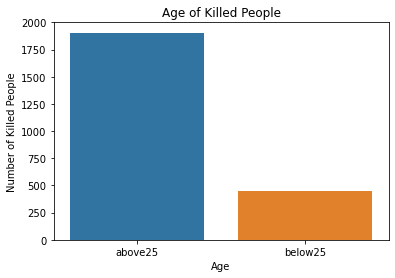

In [273]:
fig, ax = plt.subplots()
sns.barplot(x.index, x.values, data = kill)
ax.set_xlabel ("Age")
ax.set_ylabel("Number of Killed People")
ax.set_title("Age of Killed People" )

**INSTRUCTION-4: Plot number of killed poeple by race**

In [276]:
z = kill.race.value_counts()
z

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [277]:
z.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [278]:
z.values

array([1201,  618,  423,   39,   31,   28], dtype=int64)

Text(0.5, 1.0, 'Race of Killed People')

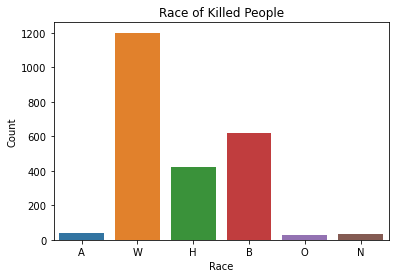

In [281]:
fig, ax = plt.subplots()
sns.barplot(z.index, z.values, data = kill, order = ["A", "W", "H", "B", "O", "N"])
ax.set_xlabel ("Race")
ax.set_ylabel("Count")
ax.set_title("Race of Killed People" )

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [282]:
kill.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


In [289]:
v = kill.city.value_counts().head(12)
v

Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Austin          18
Miami           18
St. Louis       15
Indianapolis    14
Albuquerque     14
Name: city, dtype: int64

In [290]:
v.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Indianapolis', 'Albuquerque'],
      dtype='object')

In [291]:
v.values

array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14], dtype=int64)

Text(0.5, 1.0, 'Most dangerous cities')

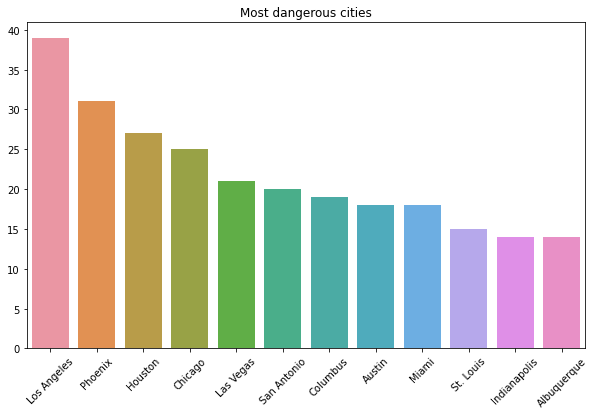

In [304]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(v.index, v.values, data = kill)
plt.xticks(rotation = 45)
ax.set_title("Most dangerous cities") # 

**INSTRUCTION-6: Plot 20 most dangerous states**

In [310]:
v = kill.state.value_counts().head(20)
v

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
WA     62
IL     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

In [311]:
v.index

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO', 'WA', 'IL',
       'TN', 'LA', 'NM', 'PA', 'AL', 'VA', 'NY', 'SC'],
      dtype='object')

In [312]:
v.values

array([424, 225, 154, 118,  79,  78,  74,  70,  69,  64,  62,  62,  59,
        57,  51,  51,  50,  47,  45,  44], dtype=int64)

Text(0.5, 1.0, 'Most dangerous state')

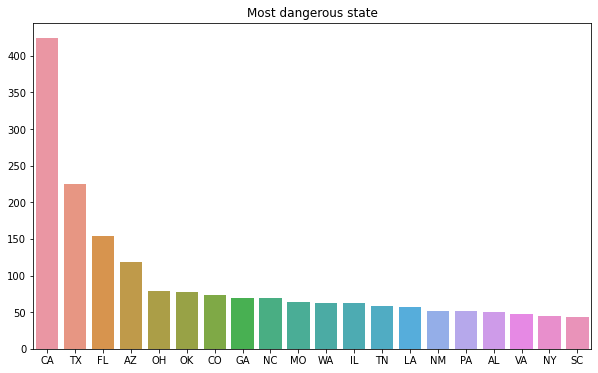

In [313]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(v.index, v.values, data = kill)
ax.set_title("Most dangerous state") # 

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

In [314]:
kill.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


In [316]:
a = kill.signs_of_mental_illness.value_counts()
a

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [317]:
a.index

Index([False, True], dtype='object')

In [318]:
a.values

array([1902,  633], dtype=int64)

Text(0.5, 1.0, 'Having mental ilness of people')

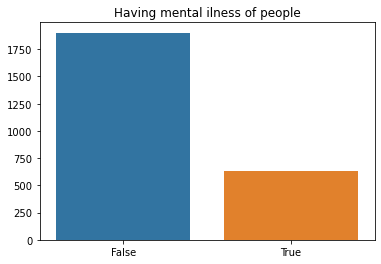

In [322]:
fig, ax = plt.subplots()
sns.barplot(a.index, a.values, data = kill)
ax.set_title("Having mental ilness of people") # 

**INSTRUCTION-8: Plot number of Threat Types**

In [324]:
b = kill.threat_level.value_counts()
b

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

In [325]:
b.index

Index(['attack', 'other', 'undetermined'], dtype='object')

In [326]:
b.values

array([1611,  766,  158], dtype=int64)

Text(0, 0.5, 'Count')

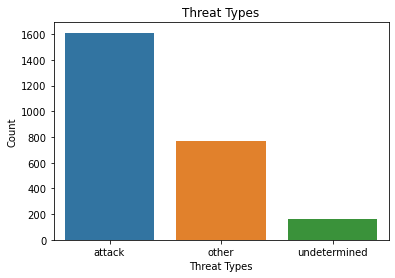

In [328]:
fig, ax = plt.subplots()
sns.barplot(b.index, b.values, data = kill)
ax.set_title("Threat Types")
ax.set_xlabel ("Threat Types")
ax.set_ylabel("Count")

**INSTRUCTION-9: Plot number of Flee Types**

In [330]:
b = kill.flee.value_counts()
b

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [331]:
b.index

Index(['Not fleeing', 'Car', 'Foot', 'Other'], dtype='object')

In [332]:
b.values

array([1695,  385,  294,   96], dtype=int64)

Text(0, 0.5, 'Count')

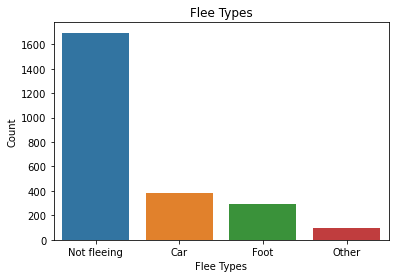

In [333]:
fig, ax = plt.subplots()
sns.barplot(b.index, b.values, data = kill)
ax.set_title("Flee Types")
ax.set_xlabel ("Flee Types")
ax.set_ylabel("Count")